# **분류 소개**
---

[Getting started with classification](https://github.com/codingalzi/ML-For-Beginners/tree/main/4-Classification) 내용 정리

분류는  지도 학습의 한 형태이며 일반적으로 분류는 이진 분류와 다중 클래스 분류의 두 그룹으로 나뉜다.


*   **선형 회귀** 를 사용하면 변수 사이 관계를 예측하고 새로운 데이터 포인트로 라인과 엮인 위치에 대한 정확한 예측 가능      ex) 9월과 
12월의 호박 가격 예측 가능
*   **로지스틱 회귀** 는 "이진 범주"를 찾는 데 유용함             ex) 이 가격대에서 이 호박은 주황색인지 아닌지

분류는 데이터 포인트의 레이블 또는 클래스를 결정하는 다른 방법을 결정하기 위해 다양한 알고리즘을 사용한다. 이 요리 데이터를 사용하여 재료 그룹을 관찰하여 원산지 요리를 결정할 수 있는지 알아보자.


## **chap1**

### **데이터 불러오기**
---

In [ ]:
pip install imblearn

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from imblearn.over_sampling import SMOTE

In [ ]:
df  = pd.read_csv("../input/asian-and-indian-cuisines/asian_indian_recipes.csv")

In [ ]:
df.head()

In [ ]:
df.info()

### **연습 - 요리에 대해 배우기**
---

In [ ]:
df.cuisine.value_counts().plot.barh()

요리의 수가 한정되어있지만, 데이터의 분포가 고르지 않다.

In [ ]:
# 요리별로 사용할 수 있는 데이터 크기
thai_df = df[(df.cuisine == "thai")]
japanese_df = df[(df.cuisine == "japanese")]
chinese_df = df[(df.cuisine == "chinese")]
indian_df = df[(df.cuisine == "indian")]
korean_df = df[(df.cuisine == "korean")]

print(f'thai df: {thai_df.shape}')
print(f'japanese df: {japanese_df.shape}')
print(f'chinese df: {chinese_df.shape}')
print(f'indian df: {indian_df.shape}')
print(f'korean df: {korean_df.shape}')

### **성분 발견하기**
---

지금부터 데이터를 깊게 파서 요리별 일반적인 재료가 무엇인지 배우기위해 요리 사이의 혼동을 일으킬 중복 데이터를 정리해보자.

* Python에서 성분 데이터프레임을 생성하기 위해서 create_ingredient() 함수를 만든다. 이 함수는 도움이 안되는 열을 삭하고 개수별로 재료를 정렬한다.

In [ ]:
def create_ingredient_df(df):
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False,
    inplace=False)
    return ingredient_df

함수를 사용하여 요리별 가장 인기있는 10개 재료의 아이디어를 얻을 수 있다.

In [ ]:
#타이
thai_ingredient_df = create_ingredient_df(thai_df)
thai_ingredient_df.head(10).plot.barh()

In [ ]:
#일본
japanese_ingredient_df = create_ingredient_df(japanese_df)
japanese_ingredient_df.head(10).plot.barh()

In [ ]:
#중국
chinese_ingredient_df = create_ingredient_df(chinese_df)
chinese_ingredient_df.head(10).plot.barh()

In [ ]:
#인도
indian_ingredient_df = create_ingredient_df(indian_df)
indian_ingredient_df.head(10).plot.barh()

In [ ]:
#한국
korean_ingredient_df = create_ingredient_df(korean_df)
korean_ingredient_df.head(10).plot.barh()

 전통 요리 사이에 혼란을 주는 가장 공통적인 재료를 삭제 : 

In [ ]:
feature_df= df.drop(['cuisine','Unnamed: 0','rice','garlic','ginger'], axis=1)
labels_df = df.cuisine #.unique()
feature_df.head()

### **데이터셋 균형 맞추기**
---

데이터를 정리 했으므로 SMOTE ("Synthetic Minority Over-sampling Technique")를 사용하여 균형을 맞춘다.

In [ ]:
#fit_resample(): 보간으로 새로운 샘플을 생성함 
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df, labels_df)

데이터의 균형을 맞추면 분류할 때 더 나은 결과를 얻을 수 있다. 데이터 균형을 맞추면 왜곡된 데이터를 가져와 이러한 불균형을 제거하는 데 도움이 된다.

In [ ]:
print(f'new label count: {transformed_label_df.value_counts()}')
print(f'old label count: {df.cuisine.value_counts()}')

균형이 잘 잡힘

In [ ]:
# 레이블과 특성을 포함한 균형 잡힌 데이터를 파일로 내보낼 수 있는 새 데이터 프레임에 저장
transformed_df = pd.concat([transformed_label_df,transformed_feature_df],axis=1, join='outer')
transformed_df

## **chap2**

### **연습 - 국가 요리 예측하기**
---

In [ ]:
transformed_df.head()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve
from sklearn.svm import SVC

In [ ]:
cuisines_label_df = transformed_df['cuisine']
cuisines_label_df.head()

In [ ]:
# cuisine 열 삭제 
cuisines_feature_df = transformed_df.drop(['cuisine'], axis=1)
cuisines_feature_df.head()

### **분류기 선택**
---
데이터가 정리되고 학습할 준비가 되었으므로 작업에 사용할 알고리즘을 결정해야함

Scikit-learn은 지도 학습에서 분류를 그룹화하고 해당 범주에서 분류하는 다양한 방법을 찾을 수 있음
* 선형 모델
* 서포트 벡터 머신
* 확률적 경사하강법
* 가장 가까운 이웃
* 가우스 프로세스
* 의사결정나무
* 앙상블 방법(투표 분류기)
* 다중 클래스 및 다중 출력 알고리즘(다중 클래스 및 다중 레이블 분류, 다중 클래스 다중 출력 분류)
* 신경망 (이 강의의 범위를 벗어나므로 여기선 사용x)

분류기를 선택하기위해선 여러 가지를 실행하고 좋은 결과를 찾는 것이 테스트하는 방법이다.

#### **더 나은 접근법**
성급히 추측하기보다 더 나은 방법은 다운로드 가능한 ML Cheat sheet의 아이디어를 따르는 것이다.
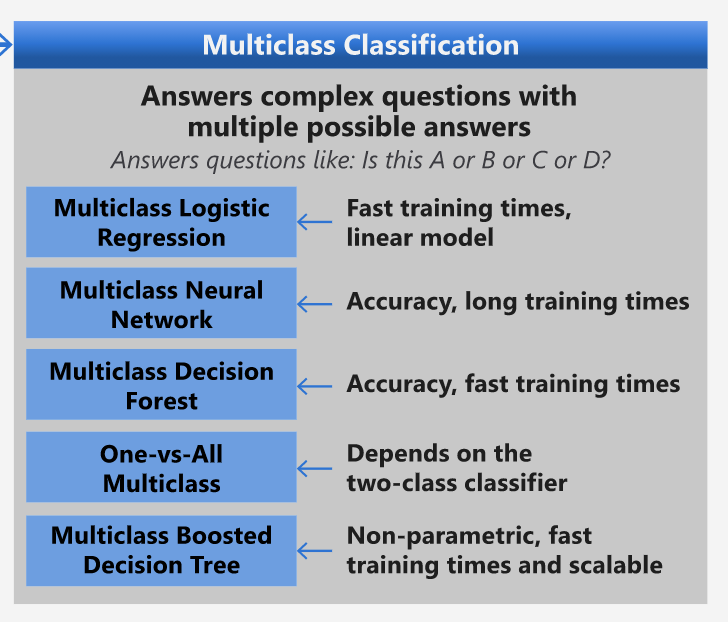
> 다중 클래스 분류 옵션을 자세히 설명하는 Microsoft의 알고리즘 치트 시트 섹션!

기본적으로 Scikit-learn에 로지스틱 회귀를 수행하도록 요청할 때 지정해야 하는 `multi_class` 와 `solver` 중요한 두 개의 파라미터가 있다. 
* `multi_class` 값은 특정 동작을 적용
* `solver`의 값은 사용할 알고리즘



### **연습-데이터 나누기**
---

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(cuisines_feature_df, cuisines_label_df, test_size=0.3)

### **연습 - 로지스틱 회귀 적용하기**
---


1. multi_class를 `ovr`로 설정하고 solver도 `liblinear`로 설정하여 로지스틱 회귀를 만든다.

In [ ]:
lr = LogisticRegression(multi_class='ovr',solver='liblinear')
model = lr.fit(X_train, np.ravel(y_train))

accuracy = model.score(X_test, y_test)
print ("Accuracy is {}".format(accuracy))

정확도 80%이상으로 좋음

In [ ]:
print(f'ingredients: {X_test.iloc[50][X_test.iloc[50]!=0].keys()}')
print(f'cuisine: {y_test.iloc[50]}')

In [ ]:
test= X_test.iloc[50].values.reshape(-1, 1).T
proba = model.predict_proba(test)
classes = model.classes_
resultdf = pd.DataFrame(data=proba, columns=classes)

topPrediction = resultdf.T.sort_values(by=[0], ascending = [False])
topPrediction.head()

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))